In [99]:
!pip3 install -q -U watermark
%load_ext watermark

In [3]:
#Imports

import sklearn 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings

In [101]:
warnings.filterwarnings('ignore')
%watermark -a "Wellington Costa"

Author: Wellington Costa



## Carregando e Identificando os Tipos de Dados

In [4]:
# Carrega o dataset
df = pd.read_csv('dataset.csv')

In [5]:
# Shape
df.shape

(400, 7)

In [6]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   valor_venda_unitario  400 non-null    float64
 1   valor_venda_total     400 non-null    int64  
 2   custo_entrega         400 non-null    int64  
 3   status_entrega        400 non-null    object 
 4   idade_vendedor        400 non-null    int64  
 5   area_urbana           400 non-null    object 
 6   cliente_local         400 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 22.0+ KB


In [8]:
# Amostra dos dados
df.head()

,valor_venda_unitario,valor_venda_total,custo_entrega,status_entrega,idade_vendedor,area_urbana,cliente_local
0,9.50,138,11,Ruim,42,Sim,Sim
1,11.22,111,16,Bom,65,Sim,Sim
2,10.06,113,10,Medio,59,Sim,Sim
3,7.40,117,4,Medio,55,Sim,Sim
4,4.15,141,3,Ruim,38,Sim,Nao


## Análise Exploratória de Acordo com o tipo de Variável

In [104]:
# Configuração de estilo
sns.set(style='darkgrid')

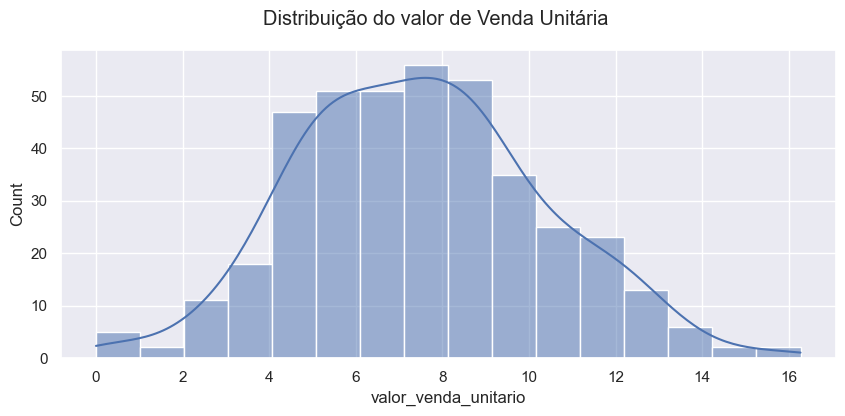

In [105]:
# Plot de valor_venda_unitario
fig, axes = plt.subplots(1, 1, figsize = (10, 4))
fig.suptitle('Distribuição do valor de Venda Unitária')
sns.histplot(df['valor_venda_unitario'], kde = True);

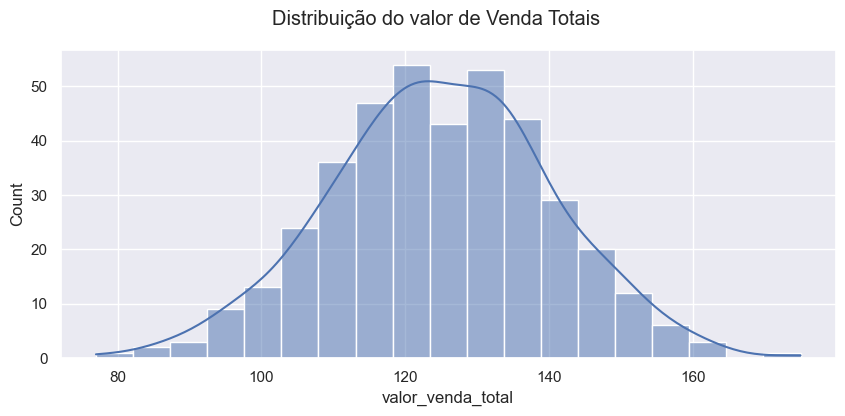

In [106]:
# Plot de valor_venda_total
fig, axes = plt.subplots(1, 1, figsize = (10, 4))
fig.suptitle('Distribuição do valor de Venda Totais')
sns.histplot(df['valor_venda_total'], kde = True);

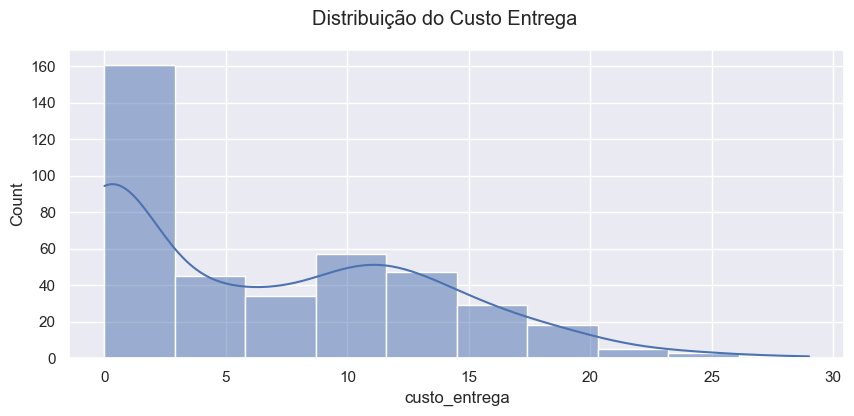

In [107]:
# Plot de custo_entrega
fig, axes = plt.subplots(1, 1, figsize = (10, 4))
fig.suptitle('Distribuição do Custo Entrega')
sns.histplot(df['custo_entrega'], kde = True);

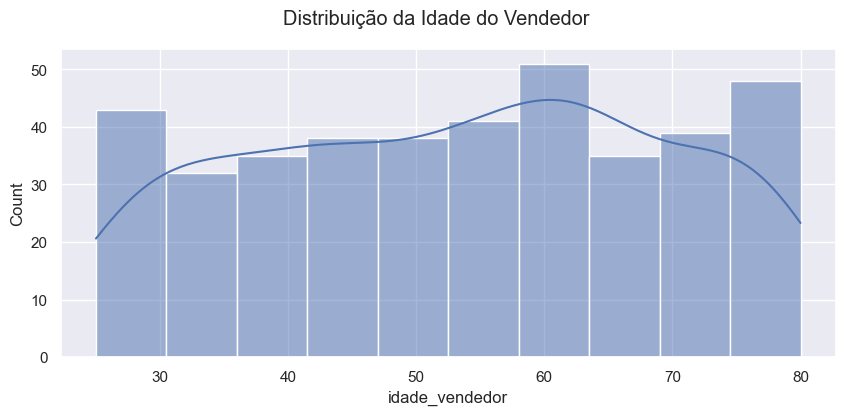

In [108]:
# Plot de idade_vendedor
fig, axes = plt.subplots(1, 1, figsize = (10, 4))
fig.suptitle('Distribuição da Idade do Vendedor')
sns.histplot(df['idade_vendedor'], kde = True);

In [14]:
# Configurando o estilo
sns.set(style='whitegrid')

In [15]:
# Tabela de frequência
df['status_entrega'].value_counts()

status_entrega
Medio    219
Ruim      96
Bom       85
Name: count, dtype: int64

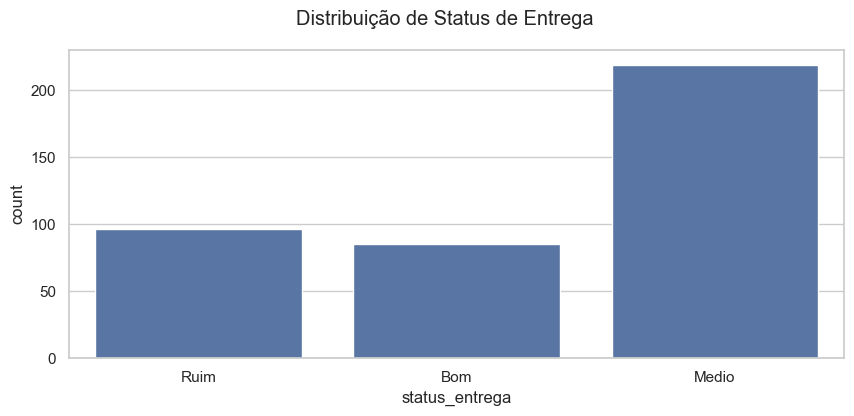

In [16]:
# Plot de status_entrega
fig, axes = plt.subplots(1, 1, figsize = (10, 4))
fig.suptitle('Distribuição de Status de Entrega')
sns.countplot(data = df, x = 'status_entrega');

In [17]:
# Tabela de frequência
df['area_urbana'].value_counts()

area_urbana
Sim    282
Nao    118
Name: count, dtype: int64

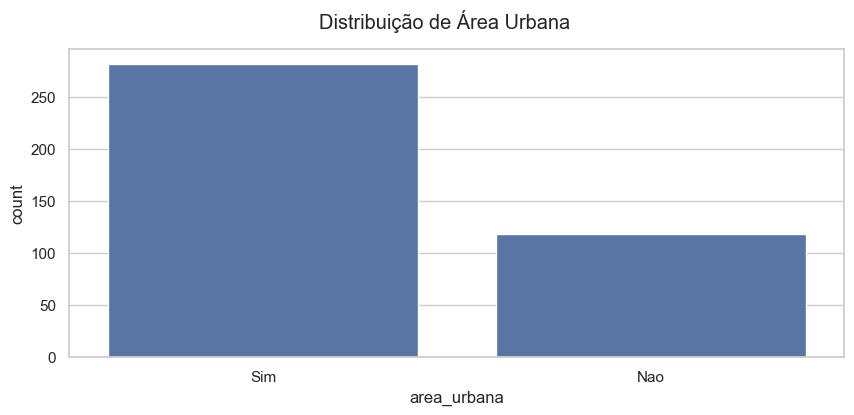

In [18]:
# Plot de area_urbana
fig, axes = plt.subplots(1, 1, figsize = (10, 4))
fig.suptitle('Distribuição de Área Urbana')
sns.countplot(data = df, x = 'area_urbana');

In [20]:
# Tabela de frequência
df['cliente_local'].value_counts()

cliente_local
Sim    258
Nao    142
Name: count, dtype: int64

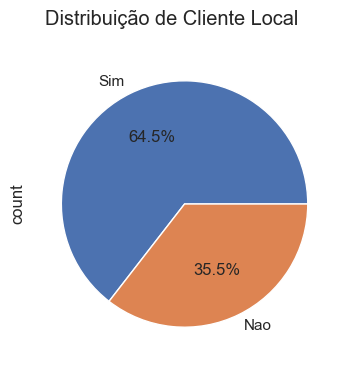

In [23]:
# Plot de cliente_local
fig, axes = plt.subplots(1, 1, figsize = (10, 4))
fig.suptitle('Distribuição de Cliente Local')
df['cliente_local'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%');

## Criando e Analisando Tabela de Frequência em Python

In [24]:
# Cria a tabela de frequência 
freq_status_entrega = df['status_entrega'].value_counts()

In [25]:
freq_status_entrega

status_entrega
Medio    219
Ruim      96
Bom       85
Name: count, dtype: int64

In [26]:
# Cria a tabela de frequência
freq_area_urbana = df['area_urbana'].value_counts()

In [27]:
freq_area_urbana

area_urbana
Sim    282
Nao    118
Name: count, dtype: int64

In [28]:
# Cria a tabela de frequência
freq_cliente_local = df['cliente_local'].value_counts()

In [29]:
freq_cliente_local

cliente_local
Sim    258
Nao    142
Name: count, dtype: int64

## Criando e Analisando Tabela de Contigência em Python

In [31]:
# Cria a tabela de contingência
conting_status_area = pd.crosstab(df['status_entrega'], df['area_urbana'])

In [32]:
conting_status_area

area_urbana,Nao,Sim
status_entrega,,
Bom,28,57
Medio,68,151
Ruim,22,74


In [33]:
# Cria tabela de contingência 
conting_status_cliente = pd.crosstab(df['status_entrega'], df['cliente_local'])

In [34]:
conting_status_cliente

cliente_local,Nao,Sim
status_entrega,,
Bom,24,61
Medio,84,135
Ruim,34,62


In [36]:
# Criando uma tabela de contingência com três variáveis
contingency_3d = pd.crosstab(index = [df['status_entrega'], df['area_urbana']],
                             columns = df['cliente_local'],
                             margins = True,
                             margins_name = 'Total')

In [37]:
contingency_3d

cliente_local               Nao  Sim  Total
status_entrega area_urbana                 
Bom            Nao            6   22     28
               Sim           18   39     57
Medio          Nao           29   39     68
               Sim           55   96    151
Ruim           Nao           11   11     22
               Sim           23   51     74
Total                       142  258    400

## Estratégia 1 de Tratamento de variáveis Catégoricas - One-Hot Encoding
Ideal para variáveis qualitativas nominais.

![DSA](one-hot-encoding.png)

In [39]:
# Selecionando as variáveis independentes (X) e a dependente (y)
X = df.drop('custo_entrega', axis = 1)
y = df['custo_entrega']

In [47]:
# Separa as variáveis categóricas e numéricas, pois terão processamentos diferentes
categorical_features = ['status_entrega', 'area_urbana', 'cliente_local']
numerical_features = ['valor_venda_unitario', 'valor_venda_total', 'idade_vendedor']

In [48]:
# Cria o transformador para variáveis categóricas  o 'drop = first' evita uma alta colinariedade
categorical_transformer = OneHotEncoder(drop = 'first')

In [49]:
# Cria o transformador para variáveis numéricas
numerical_transforme = StandardScaler()

- Não precisa aplicar o 'StandardScaler' no conjunto de dados categorico pois o 'OneHotEnconder' já coloca as variavéis em uma única escala.
- O StandardScaler() -> Coloca os Conjuntos de dados númericos em uma única escala.

In [50]:
# Combina os transformadores
# Pré-processamento: Codificação One-Hot para variáveis categóricas e padronização para nméricas
preprocessor_v1 = ColumnTransformer(
    transformers = [
        ('num', numerical_transforme, numerical_features),
        ('cat', categorical_transformer, categorical_features)]
)

In [51]:
# Criando o pipeline com o processamento e com o modelo 
modelo_v1 = Pipeline(steps = [('preprocessor', preprocessor_v1), ('regressor', LinearRegression())])

## Impacto da Estratégia 1 na Modelagem Preditiva

In [52]:
# Dividindo os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [53]:
# Fit somente com dados de treino
modelo_v1.fit(X_treino, y_treino)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['valor_venda_unitario',
                                                   'valor_venda_total',
                                                   'idade_vendedor']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['status_entrega',
                                                   'area_urbana',
                                                   'cliente_local'])])),
                ('regressor', LinearRegression())])

In [55]:
# Usamos predict nos dados de teste
y_pred = modelo_v1.predict(X_teste)

In [58]:
# Avaliando o modelo
rmse_v1 = mean_squared_error(y_teste, y_pred, squared = False)
r2_v1 = r2_score(y_teste, y_pred)

C:\Users\coswe\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [59]:
print(rmse_v1)

5.099017184556864


In [60]:
print(r2_v1)

0.4218192280383193


## Estratégia 2 de tratamento de Variáveis Categóricas - Ordinal Label Enconding
- Ideal para variáveis qualitativas ordinais.

![DSA](ordinal-label-encoding.png)

In [61]:
# Separa as variáveis categóricas (nominais e ordinais) e numéricas, pois terão processamento diferentes
categorical_features_nominal = ['area_urbana', 'cliente_local']
categorical_features_ordinal = ['status_entrega']
numerical_features = ['valor_venda_unitario', 'valor_venda_total', 'idade_vendedor']

In [62]:
# transformador para as variáveis categóricas ordinal
categorical_transformer_ordinal = OrdinalEncoder()

In [72]:
# Transformador para as variáveis categóricas nominais 'drop = first' -> ele exclui uma coluna pra evita uma alta colinariedade
categorical_transformer_nominal = OneHotEncoder(drop = 'first')

In [73]:
# Cria o transformador para variáveis numéricas
numerical_transforme = StandardScaler()

In [74]:
# Combinando os transformadores
preprocessor_v2 = ColumnTransformer(
    transformers=[
        ('num', numerical_transforme, numerical_features),
        ('cat_nominal', categorical_transformer_nominal, categorical_features_nominal),
        ('cat_ordial', categorical_transformer_ordinal, categorical_features_ordinal)
    ]
)

In [75]:
# Pipeline
modelo_v2 = Pipeline(steps = [('preprocessor', preprocessor_v2), ('regressor', LinearRegression())])

## Impacto da Estratégia 2 na Modelagem Preditiva

In [76]:
# Fit do modelo com dados de treino
modelo_v2.fit(X_treino, y_treino)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['valor_venda_unitario',
                                                   'valor_venda_total',
                                                   'idade_vendedor']),
                                                 ('cat_nominal',
                                                  OneHotEncoder(drop='first'),
                                                  ['area_urbana',
                                                   'cliente_local']),
                                                 ('cat_ordial',
                                                  OrdinalEncoder(),
                                                  ['status_entrega'])])),
                ('regressor', LinearRegression())])

In [77]:
# Previsões com dados de teste
y_pred_v2 = modelo_v2.predict(X_teste)

In [78]:
# Avaliando o modelo atualizado
rmse_v2 = mean_squared_error(y_teste, y_pred_v2, squared = False)
r2_v2 = r2_score(y_teste, y_pred_v2)

C:\Users\coswe\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [79]:
print(rmse_v2)

5.123545938744094


In [80]:
print(r2_v2)

0.41624318669246574


## Análise dos Resultados:

As diferenças nas métricas entre os dois blocos de código (versão 1 e 2 dos modelos) podem ser atribuídas principalmente à forma como as variáveis categóricas são tratadas no pré-processamento antes de ajustar o modelo de regressão linear. Vamos analisar os principais pontos que contribuem para essa diferença:

**Tratamento de Variáveis Categóricas**

Versão 1: Todas as variáveis categóricas são tratadas usando OneHotEncoder com a opção drop='first', o que reduz a multicolinearidade ao remover uma categoria de cada variável categórica transformada. Este método cria variáveis dummy para cada categoria, excluindo a primeira para evitar a redundância.

Versão 2: Separa as variáveis categóricas em nominais e ordinais. As nominais continuam sendo tratadas com OneHotEncoder (também com drop='first'), enquanto as ordinais são tratadas com OrdinalEncoder. Esta abordagem mantém a ordem natural das variáveis categóricas ordinais, o que pode ser importante dependendo da relação entre a variável categórica e a variável dependente.

**Impacto no Modelo**

Representação de Dados: A principal diferença entre os blocos está na forma como as informações categóricas são representadas e inseridas no modelo. Ao tratar variáveis ordinais de maneira diferenciada, o Bloco 2 pode capturar melhor a relação ordinal inerente, o que, teoricamente, poderia levar a uma modelagem mais precisa.

Resultados: Na prática, as métricas de desempenho (RMSE e R²) do Bloco 2 são ligeiramente piores do que as do Bloco 1. Isso pode indicar que, para este conjunto específico de dados e tarefa de modelagem, a informação capturada pela codificação ordinal não compensou a complexidade adicional ou a representação simplificada que ela oferece. Outra possibilidade é que a relação entre a variável categórica ordinal e a variável dependente não seja linear ou não se beneficie da representação ordinal neste contexto específico.

**Considerações**

Escolha do Método de Codificação: A escolha entre diferentes métodos de codificação **depende** da natureza das variáveis categóricas e de como elas se relacionam com a variável dependente. Nem sempre a abordagem mais complexa (separando nominais de ordinais) resulta em melhor desempenho do modelo.

Ajustes no Modelo: Alterações no pré-processamento e na codificação das variáveis podem requerer ajustes adicionais no modelo, como a seleção de variáveis ou a otimização de hiperparâmetros.

Vamos usar a versão 1 para a análise das variáveis.

## Interpretação a Relação das Variáveis Preditoras com a Variável alvo

In [81]:
# Para extrair os coeficientes, precisamos acessar o regressor dentro do pipeline...
model_regressor = modelo_v1.named_steps['regressor']

In [82]:
# ... e também a transformação One-Hot para obter os nomes das variáveis
atrib_cat = modelo_v1.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)

In [83]:
atrib_cat

array(['status_entrega_Medio', 'status_entrega_Ruim', 'area_urbana_Sim',
       'cliente_local_Sim'], dtype=object)

In [86]:
# Combinando os nomes das variáveis numéricas e categóricas transformadas
nomes_todos_atributos = numerical_features + list(atrib_cat)

In [84]:
# Coeficientes do modelo
coeficientes = model_regressor.coef_

In [85]:
coeficientes

array([ 1.5759904 , -0.17500897,  0.36883283,  1.33280247,  1.70116209,
       -0.36918643,  9.04891871])

In [87]:
coef_df = pd.DataFrame({'Atributo': nomes_todos_atributos, 'Coeficiente': coeficientes})

In [88]:
# Ordenando os coeficientes por magnitude (valor absoluto)
coef_df = coef_df.reindex(coef_df.Coeficiente.abs().sort_values(ascending = False).index)

In [90]:
coef_df

,Atributo,Coeficiente
6,cliente_local_Sim,9.048919
4,status_entrega_Ruim,1.701162
0,valor_venda_unitario,1.575990
3,status_entrega_Medio,1.332802
5,area_urbana_Sim,-0.369186
2,idade_vendedor,0.368833
1,valor_venda_total,-0.175009


- A interpretação dos coeficientes em um modelo de regressão linear fornece insights sobre como cada variável preditora (ou "feature") influencia a variável alvo, assumindo que todas as outras variáveis no modelo permanecem constantes. Aqui está uma interpretação detalhada dos coeficientes fornecidos:

**cliente_local_Sim (9.048919)**: Quando o cliente é local (Sim), espera-se, em média, um aumento de aproximadamente 9.05 unidades no custo de entrega, comparado a quando o cliente não é local (base ou referência), mantendo as demais variáveis constantes. Esta variável tem o impacto mais significativo entre as examinadas.

**status_entrega_Ruim (1.701162)**: Ter um status de entrega classificado como "Ruim" está associado a um aumento de cerca de 1.70 unidades no custo de entrega, comparado à categoria de base (que pode ser "Bom"), mantendo as demais variáveis constantes.

**valor_venda_unitario (1.575990)**: Um aumento de uma unidade no valor de venda unitário está associado a um aumento de aproximadamente 1.58 unidades no custo de entrega, mantendo as demais variáveis constantes.

**status_entrega_Medio (1.332802)**: Um status de entrega "Medio" está associado a um aumento de cerca de 1.33 unidades no custo de entrega, comparado à categoria de base, mantendo as demais variáveis constantes.

**area_urbana_Sim (-0.369186)**: Vendas realizadas em áreas urbanas estão associadas a uma diminuição de aproximadamente 0.37 unidades no custo de entrega, comparadas a vendas em áreas não urbanas (base ou referência), mantendo as demais variáveis constantes.

**idade_vendedor (0.368833)**: Um aumento de um ano na idade do vendedor está associado a um aumento de cerca de 0.37 unidades no custo de entrega, mantendo as demais variáveis constantes.

**valor_venda_total (-0.175009)**: Um aumento de uma unidade no valor total de venda está associado a uma diminuição de aproximadamente 0.18 unidades no custo de entrega, mantendo as demais variáveis constantes.

Interpretação Geral:

- Variáveis com coeficientes positivos aumentam o custo de entrega quando aumentam (ou estão presentes, no caso de variáveis categóricas binárias como "cliente_local_Sim").
- Variáveis com coeficientes negativos diminuem o custo de entrega quando aumentam.
- A magnitude do coeficiente indica o tamanho do efeito: variáveis com coeficientes maiores têm um impacto mais significativo na variável alvo.
- É importante lembrar que esses efeitos são modelados para ocorrer mantendo todas as outras variáveis constantes, o que nem sempre pode ser o caso na prática.